In [8]:
import pandas as pd

from deep_translator import GoogleTranslator

In [11]:
df_chatbot=pd.read_csv('tripadvisor_hotel_reviews.csv')
df_chatbot

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20485,"best kept secret 3rd time staying charm, not 5...",5
20486,great location price view hotel great quick pl...,4
20487,"ok just looks nice modern outside, desk staff ...",2
20488,hotel theft ruined vacation hotel opened sept ...,1


In [134]:
import pandas as pd
from deep_translator import GoogleTranslator
from deep_translator.exceptions import NotValidPayload


df_chatbot = pd.read_csv('tripadvisor_hotel_reviews.csv')


reviews = df_chatbot['Review'][16900:17000]

translated_reviews = []

for index, review in reviews.items():
    rating = df_chatbot.loc[index, 'Rating']
    
    chunks = [review[i:i+5000] for i in range(0, len(review), 5000)]
    
    for chunk in chunks:
        if len(chunk) <= 5000:
            try:
                translated_chunk = GoogleTranslator(source='auto', target='es').translate(chunk)
                translated_reviews.append((translated_chunk, rating))
            except NotValidPayload as e:
                print(f"Error translating text: {e}")
        else:
            print("Chunk length exceeds 5000 characters.")


In [121]:
df_translated_reviews16900 = pd.DataFrame(translated_reviews, columns=['Translated_Review', 'Rating'])
df_translated_reviews16900

,Translated_Review,Rating
0,exactamente lo esperado Me quedé en Sunroute e...,4
1,"agradable sorpresa hotel agradable sorpresa, v...",4
2,Excelente estancia Me alojé en el hotel 1-4. E...,4
3,"excelente ubicación, estadía de una noche, via...",4
4,"Excelente relación calidad-precio, el servicio...",5
...,...,...
153,Los viajeros caribeños más agradables y experi...,5
154,maravilloso club de vacaciones diamante bahia ...,5
155,"No me molesté en quedarme en la puerta, me que...",1
156,"escribió el encabezado, breve. comida repugnan...",1


In [122]:
df_combined = pd.concat([df_translated_reviews2000, df_translated_reviews3000,df_translated_reviews3500,
                         df_translated_reviews3100,df_translated_reviews3200,
                         df_translated_reviews3300,df_translated_reviews3800, 
                         df_translated_reviews4000,df_translated_reviews4400,
                        df_translated_reviews5400, df_translated_reviews6400, df_translated_reviews7400
                        , df_translated_reviews8400, df_translated_reviews7700, df_translated_reviews9400
                        , df_translated_reviews10400, df_translated_reviews11400, df_translated_reviews12400
                        , df_translated_reviews13400,df_translated_reviews12600,df_translated_reviews13050
                        ,df_translated_reviews15400,df_translated_reviews14700,df_translated_reviews14800
                        ,df_translated_reviews15800,df_translated_reviews17400,df_translated_reviews16800
                        ,df_translated_reviews16900], ignore_index=True)
df_combined

,Translated_Review,Rating
0,"bonito hotel, aparcamiento caro, consiguió una...",4
1,"ok, nada de cargo especial, miembro diamante h...",2
2,"Bonitas habitaciones, no un hotel de 4* con ex...",3
3,"Único, estancia estupenda, tiempo maravilloso ...",5
4,"estancia estupenda estancia estupenda, fue inc...",5
...,...,...
13127,Los viajeros caribeños más agradables y experi...,5
13128,maravilloso club de vacaciones diamante bahia ...,5
13129,"No me molesté en quedarme en la puerta, me que...",1
13130,"escribió el encabezado, breve. comida repugnan...",1


In [124]:
df_combined.to_csv('comentarios_chatbot.csv')

In [126]:
#Análisis de comentarios chatbot

import pandas as pd
from textblob import TextBlob

def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0:
        return 'POSITIVO'
    elif polaridad < 0:
        return 'NEGATIVO'
    else:
        return 'NEUTRAL'

df_combined['Sentimiento'] = df_combined['Translated_Review'].apply(analizar_sentimiento)

df_combined


,Translated_Review,Rating,Sentimiento
0,"bonito hotel, aparcamiento caro, consiguió una...",4,POSITIVO
1,"ok, nada de cargo especial, miembro diamante h...",2,POSITIVO
2,"Bonitas habitaciones, no un hotel de 4* con ex...",3,NEGATIVO
3,"Único, estancia estupenda, tiempo maravilloso ...",5,NEUTRAL
4,"estancia estupenda estancia estupenda, fue inc...",5,NEUTRAL
...,...,...,...
13127,Los viajeros caribeños más agradables y experi...,5,POSITIVO
13128,maravilloso club de vacaciones diamante bahia ...,5,POSITIVO
13129,"No me molesté en quedarme en la puerta, me que...",1,NEGATIVO
13130,"escribió el encabezado, breve. comida repugnan...",1,NEUTRAL


In [127]:
df_combined.to_csv('comentarios_chatbot_sentimientos.csv')

In [195]:
df_combined=pd.read_csv('comentarios_chatbot_sentimientos.csv')

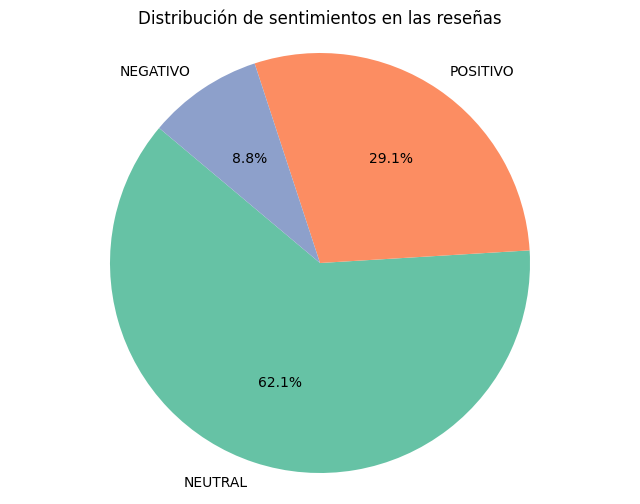

In [130]:

import pandas as pd
import matplotlib.pyplot as plt


conteo_sentimientos = df_combined['Sentimiento'].value_counts()

sentimientos = conteo_sentimientos.index.tolist()
cantidad = conteo_sentimientos.tolist()
colores = ['#66c2a5', '#fc8d62', '#8da0cb']  

plt.figure(figsize=(8, 6))
plt.pie(cantidad, labels=sentimientos, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de sentimientos en las reseñas')
plt.axis('equal') 
plt.show()


In [197]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Función para analizar el sentimiento del comentario usando VADER
def analizar_sentimiento_vader(texto):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(texto)
    
    # Obtener la polaridad dominante
    if scores['compound'] >= 0.05:
        return 'POSITIVO'
    elif scores['compound'] <= -0.05:
        return 'NEGATIVO'
    else:
        return 'NEUTRAL'



# Aplicar la función de análisis de sentimiento usando VADER
df_combined['Sentimiento_VADER'] = df_combined['Translated_Review'].apply(analizar_sentimiento_vader)

df_combined


,Unnamed: 0,Translated_Review,Rating,Sentimiento,Sentimiento_VADER
0,0,"bonito hotel, aparcamiento caro, consiguió una...",4,POSITIVO,NEGATIVO
1,1,"ok, nada de cargo especial, miembro diamante h...",2,POSITIVO,NEGATIVO
2,2,"Bonitas habitaciones, no un hotel de 4* con ex...",3,NEGATIVO,NEGATIVO
3,3,"Único, estancia estupenda, tiempo maravilloso ...",5,NEUTRAL,NEGATIVO
4,4,"estancia estupenda estancia estupenda, fue inc...",5,NEUTRAL,NEGATIVO
...,...,...,...,...,...
13127,13127,Los viajeros caribeños más agradables y experi...,5,POSITIVO,NEGATIVO
13128,13128,maravilloso club de vacaciones diamante bahia ...,5,POSITIVO,NEGATIVO
13129,13129,"No me molesté en quedarme en la puerta, me que...",1,NEGATIVO,NEGATIVO
13130,13130,"escribió el encabezado, breve. comida repugnan...",1,NEUTRAL,NEUTRAL


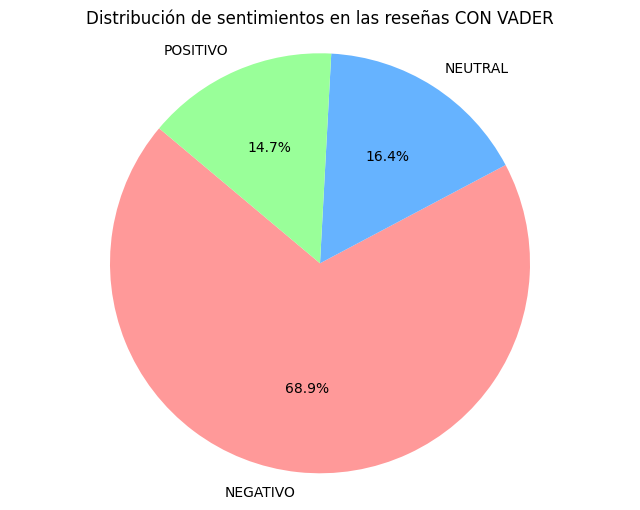

In [133]:

import pandas as pd
import matplotlib.pyplot as plt


conteo_sentimientos = df_combined['Sentimiento_VADER'].value_counts()

sentimientos = conteo_sentimientos.index.tolist()
cantidad = conteo_sentimientos.tolist()
colores =  ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(8, 6))
plt.pie(cantidad, labels=sentimientos, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de sentimientos en las reseñas CON VADER')
plt.axis('equal') 
plt.show()


In [198]:
import pandas as pd


def calcular_sentimiento(row):
    if row['Rating'] == 5:
        return 'POSITIVO'
    elif row['Rating'] == 1:
        return 'NEGATIVO'
    elif row['Sentimiento'] == 'POSITIVO' and row['Sentimiento_VADER'] == 'NEGATIVO' and row['Rating'] < 3:
        return 'NEUTRAL'
    elif row['Sentimiento'] == 'POSITIVO' and row['Sentimiento_VADER'] == 'POSITIVO' and row['Rating'] > 4:
        return 'POSITIVO'
    elif row['Sentimiento'] == 'NEGATIVO' and row['Sentimiento_VADER'] == 'POSITIVO' and row['Rating'] < 3:
        return 'NEUTRAL'
    elif row['Sentimiento'] == 'POSITIVO' and row['Sentimiento_VADER'] == 'NEGATIVO' and row['Rating'] > 3:
        return 'POSITIVO'
    else:
        return row['Sentimiento']

# Aplicar la función para calcular el campo 'SENTIMIENTO_CALCULADO'
df_combined['SENTIMIENTO_CALCULADO'] = df_combined.apply(calcular_sentimiento, axis=1)

df_combined


,Unnamed: 0,Translated_Review,Rating,Sentimiento,Sentimiento_VADER,SENTIMIENTO_CALCULADO
0,0,"bonito hotel, aparcamiento caro, consiguió una...",4,POSITIVO,NEGATIVO,POSITIVO
1,1,"ok, nada de cargo especial, miembro diamante h...",2,POSITIVO,NEGATIVO,NEUTRAL
2,2,"Bonitas habitaciones, no un hotel de 4* con ex...",3,NEGATIVO,NEGATIVO,NEGATIVO
3,3,"Único, estancia estupenda, tiempo maravilloso ...",5,NEUTRAL,NEGATIVO,POSITIVO
4,4,"estancia estupenda estancia estupenda, fue inc...",5,NEUTRAL,NEGATIVO,POSITIVO
...,...,...,...,...,...,...
13127,13127,Los viajeros caribeños más agradables y experi...,5,POSITIVO,NEGATIVO,POSITIVO
13128,13128,maravilloso club de vacaciones diamante bahia ...,5,POSITIVO,NEGATIVO,POSITIVO
13129,13129,"No me molesté en quedarme en la puerta, me que...",1,NEGATIVO,NEGATIVO,NEGATIVO
13130,13130,"escribió el encabezado, breve. comida repugnan...",1,NEUTRAL,NEUTRAL,NEGATIVO


In [200]:
df_combined.to_csv('hotel_sentimientos_general.csv')

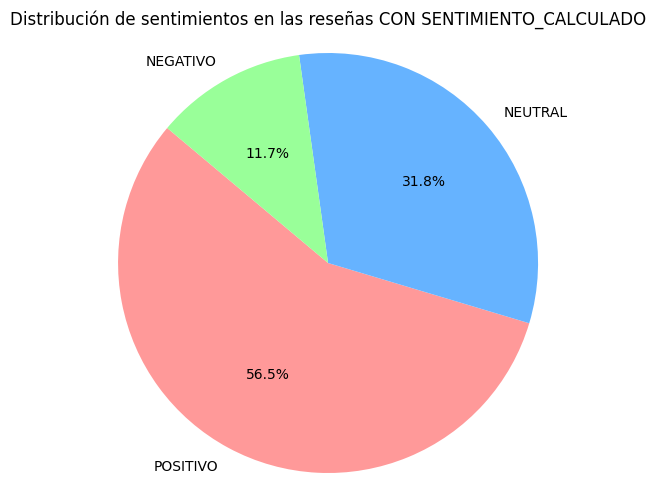

In [138]:

import pandas as pd
import matplotlib.pyplot as plt


conteo_sentimientos = df_combined['SENTIMIENTO_CALCULADO'].value_counts()

sentimientos = conteo_sentimientos.index.tolist()
cantidad = conteo_sentimientos.tolist()
colores =  ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(8, 6))
plt.pie(cantidad, labels=sentimientos, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de sentimientos en las reseñas CON SENTIMIENTO_CALCULADO')
plt.axis('equal') 
plt.show()


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Definir una función para filtrar las preposiciones
def filter_prepositions(tokens):
    preposiciones_espanol = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                        "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "el", "la", "los", "las",
                        "yo", "tú", "él", "ella", "ellas", "ellos", "nosotros", "ustedes", "esos", "eso", "y", "mi", "su",
                        "es", "un", "uno", "unas", "unos", "fue", "al", "lo", "que", "si", "estaba", "estuvo", "ni", "nos",
                        "pude", "sido", "una", "aquí", "como", "cuando", "donde", "quien", "tiene", "tenía", "porque", 
                        "más", "mas", "sí", "sólo", "también", "todo", "pero", "bien", "poco", "hace", "hacer", "hago",
                        "han", "he", "hoy", "les", "nosotras", "vosotras", "vosotros", "vos", "tú", "tus", "tuyo", "tuya",
                        "tuyos", "tuyas", "están", "estás", "está", "estáis", "estad", "estuve", "estuviste", "estuvo",
                        "estuvimos", "estuvisteis", "estuvieron", "haber", "había", "habías", "habíamos", "habíais",
                        "habían", "habré", "habrás", "habrá", "habremos", "habréis", "habrán", "habría", "habrías",
                        "habríamos", "habríais", "habrían", "había", "habías", "habíamos", "habíais", "habían", "hay",
                        "hube", "hubiste", "hubo", "hubimos", "hubisteis", "hubieron", "haya", "hayas", "hayamos",
                        "hayáis", "hayan", "habré", "habrás", "habrá", "habremos", "habréis", "habrán", "habría",
                        "habrías", "habríamos", "habríais", "habrían", "hice", "hiciste", "hizo", "hicimos", "hicisteis",
                        "hicieron", "hago", "haces", "hace", "hacemos", "hacéis", "hacen", "haga", "hagas", "hagamos",
                        "hagáis", "hagan", "hacía", "hacías", "hacíamos", "hacíais", "hacían", "hube", "hubiste", "hubo",
                        "hubimos", "hubisteis", "hubieron", "hubiera", "hubieras", "hubiéramos", "hubierais",
                        "hubieran", "hubiese", "hubieses", "hubiésemos", "hubieseis", "hubiesen", "habiendo", "habido",
                        "habida", "habidos", "habidas", "tenido", "tenida", "tenidos", "tenidas", "teniendo", "tengo",
                        "tienes", "tiene", "tenemos", "tenéis", "tienen", "tendré", "tendrás", "tendrá", "tendremos",
                        "tendréis", "tendrán", "tendría", "tendrías", "tendríamos", "tendríais", "tendrían", "tuve",
                        "tuviste", "tuvo", "tuvimos", "tuvisteis", "tuvieron", "tuviera", "tuvieras", "tuviéramos",
                        "tuvierais", "tuvieran", "tuviese", "tuvieses", "tuviésemos", "tuvieseis", "tuviesen",
                        "teniendo", "tenido", "tenida", "tenidos", "tenidas", "tened"]
    return [word for word in tokens if word.lower() not in preposiciones_espanol]



In [175]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Tokenización y eliminación de palabras vacías, descartando palabras que contienen números
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
X = vectorizer.fit_transform(df_combined['Translated_Review'])

# Obtener las palabras clave
feature_names1 = vectorizer.get_feature_names_out()

# Crear DataFrame de palabras clave
keywords_df = pd.DataFrame(X.toarray(), columns=feature_names1)




In [142]:
keywords_df

,_,__,___,____,___îè_,___îè___îè,__a,__ç,__ç__aunque,__ç_à_he,...,únicas,único,únicos,úselo,úselo__ç_é_,úselos,útil,útiles,üdifícil,ülysäes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Transponer el DataFrame para intercambiar filas y columnas
keywords_transpuesto = keywords_df.transpose()
keywords_transpuesto



,0,1,2,3,4,5,6,7,8,9,...,13122,13123,13124,13125,13126,13127,13128,13129,13130,13131
_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
__,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
___,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
____,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
___îè_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
úselos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
útil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
útiles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
üdifícil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# Obtener una lista de palabras clave por nombre de hotel, excluyendo la última fila
lista_keywords = keywords_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).to_dict()
lista_keywords

{0: ['abrirse',
  'agradable',
  'agradables',
  'al',
  'almohadas',
  'altas',
  'aniversario',
  'anteriores',
  'aparcacoches',
  'aparcamiento',
  'aprovecharon',
  'aveda',
  'baño',
  'bonito',
  'buen',
  'buena',
  'cama',
  'caro',
  'cerrarse',
  'colores',
  'como',
  'compras',
  'consejo',
  'consiguió',
  'críticas',
  'cuello',
  'cómoda',
  'decepcionado',
  'despertó',
  'distancia',
  'el',
  'en',
  'escuchar',
  'escuchó',
  'estacionamiento',
  'estancia',
  'excelente',
  'experiencia',
  'fue',
  'fuertes',
  'fácil',
  'general',
  'gente',
  'golpes',
  'habitación',
  'hablando',
  'hizo',
  'hotel',
  'inexistente',
  'insonorizadas',
  'la',
  'limpia',
  'llegó',
  'los',
  'mañana',
  'más',
  'música',
  'noche',
  'noches',
  'oferta',
  'pagar',
  'pasillo',
  'peces',
  'poca',
  'poco',
  'por',
  'productos',
  'puertas',
  'quedaron',
  'quedarse',
  'ruidosos',
  'rápido',
  'rígido',
  'sala',
  'se',
  'servicio',
  'solo',
  'tal',
  'tamaño',


In [152]:

all_keywords = keywords_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).sum()



In [190]:

all_keywords = keywords_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).sum()


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))  
# Filtrar las stopwords
stop_words.add('hotel')
filtered_keywords = [word for word in all_keywords if word.lower() not in stop_words]

filtered_keywords


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060]
[nltk_data]     Se produjo un error durante el intento de conexión ya
[nltk_data]     que la parte conectada no respondió adecuadamente tras
[nltk_data]     un periodo de tiempo, o bien se produjo un error en la
[nltk_data]     conexión establecida ya que el host conectado no ha
[nltk_data]     podido responder>


['advantage',
 'advice',
 'anniversary',
 'arrived',
 'aveda',
 'bangs',
 'bath',
 'bed',
 'check',
 'clean',
 'closing',
 'comfortable',
 'deal',
 'did',
 'disappointed',
 'distance',
 'doors',
 'easy',
 'evening',
 'existent',
 'expensive',
 'experience',
 'goldfish',
 'good',
 'got',
 'great',
 'hallway',
 'having',
 'hear',
 'heard',
 'high',
 'just',
 'late',
 'like',
 'little',
 'location',
 'longer',
 'loud',
 'maybe',
 'morning',
 'music',
 'neck',
 'neighbors',
 'nice',
 'night',
 'noisy',
 'non',
 'opening',
 'overall',
 'parking',
 'pay',
 'people',
 'pillows',
 'previous',
 'products',
 'quick',
 'reviews',
 'room',
 'shopping',
 'size',
 'soundproof',
 'stay',
 'staying',
 'stiff',
 'taken',
 'talking',
 'took',
 'touch',
 'valet',
 'view',
 'walking',
 'woke',
 'ac',
 'advertised',
 'advertising',
 'alley',
 'anniversary',
 'arrival',
 'arrived',
 'asked',
 'asking',
 'away',
 'bags',
 'bathroom',
 'bedroom',
 'beds',
 'bellman',
 'best',
 'better',
 'block',
 'booked',
 

In [192]:

all_keywords = keywords_transpuesto.iloc[:-1].apply(lambda x: x.index[x.gt(0)].tolist()).sum()


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))  
# Filtrar las stopwords
stop_words.add('hotel')
filtered_keywords = [word for word in all_keywords if word.lower() not in stop_words]

keyword_counts = pd.Series(filtered_keywords).value_counts().sort_values(ascending=False)
keyword_counts

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060]
[nltk_data]     Se produjo un error durante el intento de conexión ya
[nltk_data]     que la parte conectada no respondió adecuadamente tras
[nltk_data]     un periodo de tiempo, o bien se produjo un error en la
[nltk_data]     conexión establecida ya que el host conectado no ha
[nltk_data]     podido responder>


room            14201
staff           11767
great           11126
stay            10191
good             9401
                ...  
refreshen           1
incovenience        1
equpped             1
thyseen             1
swears              1
Name: count, Length: 49841, dtype: int64

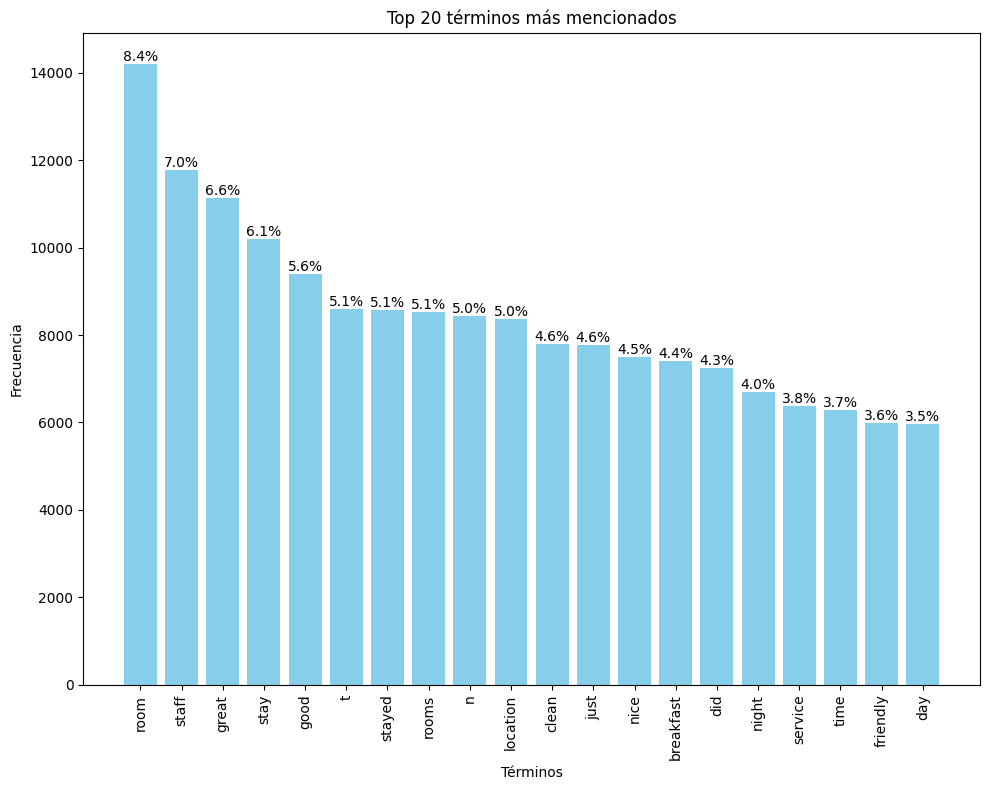

In [193]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que keyword_counts es un diccionario donde las claves son los términos y los valores son los recuentos
# Assuming keyword_counts is a numpy ndarray
top_keywords = list(keyword_counts.keys())[:20]
counts = keyword_counts[:20]  # Use indexing to get the first 20 elements

# Ordenar los datos de mayor a menor
sorted_indices = np.argsort(counts)[::-1]  # Índices ordenados de forma descendente
sorted_counts = np.array([counts[i] for i in sorted_indices])
sorted_keywords = [top_keywords[i] for i in sorted_indices]

# Calcular porcentajes
total = np.sum(sorted_counts)
percentages = (sorted_counts / total) * 100

# Crear el gráfico de barras ordenado con porcentajes
plt.figure(figsize=(10, 8))
bars = plt.bar(sorted_keywords, sorted_counts, color='skyblue')

# Agregar etiquetas con porcentajes
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Términos')
plt.ylabel('Frecuencia')
plt.title('Top 20 términos más mencionados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [194]:
keyword_counts

room            14201
staff           11767
great           11126
stay            10191
good             9401
                ...  
refreshen           1
incovenience        1
equpped             1
thyseen             1
swears              1
Name: count, Length: 49841, dtype: int64